# Matplotlib

## 1. Setting Up and Drawing the Simplest Plot 
The core of Matplotlib plotting relies on three steps:
importing the necessary module, generating the data, and calling a plot function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np # Used for easily generating data
import pandas as pd # Used for easily creating data frame

The Line Plot (plt.plot())The plt.plot()

function takes two arguments: the values for the x-axis and the values for the y-axis.

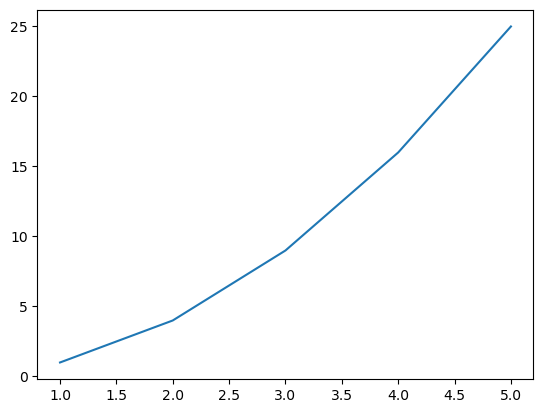

In [2]:
# 1. Prepare Data
# Let's plot y = x^2
x_values = np.array([1, 2, 3, 4, 5]) 
y_values = x_values ** 2 

# 2. Create the Plot
plt.plot(x_values, y_values) 

# 3. Display the Plot
plt.show()

## 2. Customizing the Plot: Labels and Aesthetics

A plot isn't useful without proper labels. We use dedicated plt functions for titles and axes.

#### Adding text

|Function | Purpose||
| :--- | :---: | ---: |
plt.title() | Sets the main title of the plot.
plt.xlabel() | Labels the horizontal (X) axis.
plt.ylabel() | Labels the vertical (Y) axis.

#### Customizing Lines and Points

You can change the look of your plot by passing keyword arguments to plt.plot():

- **color or c**: Line color (e.g., 'red', 'blue', 'green').

- **linestyle ls**: Style of the line (e.g., '-', '--', ':', '-.').

- **marker**: Shape of the points (e.g., 'o' for circle, '*' for star, 'D' for diamond).

#### Adding Marker 
Code Example (Line Plot)

In a line plot, adding a marker is useful to show the exact location of the data points, even when the points are connected by a line.

#### Common Marker Styles 
Matplotlib provides many built-in marker styles. Here are some of the most frequently used codes:

| Marker Code | Description |  |
| :--- | :---: | ---: |
’o’ | Circle (most common)
’*’ | Star
’+’ | Plus
’x’ | X
’s’ | Square
’D’ | Diamond
'^' | Triangle Up

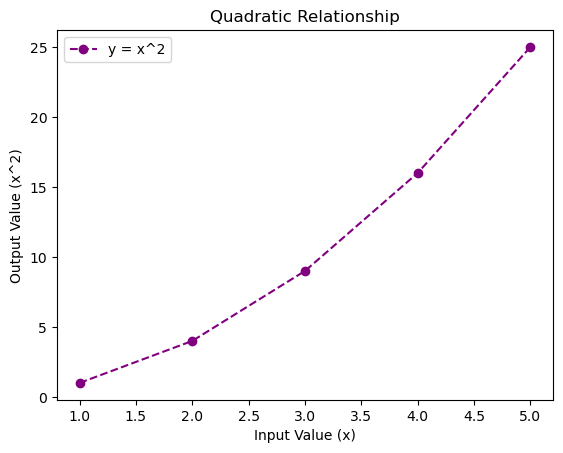

In [3]:
# Reusing the x_values and y_values from above

lin=plt.plot(x_values, y_values, 
         color='purple', 
         linestyle='--', 
         marker='o', 
         label='y = x^2') # Label is used for the legend

# Add Labels and Title
plt.title("Quadratic Relationship")
plt.xlabel("Input Value (x)")
plt.ylabel("Output Value (x^2)")

# Add a Legend (uses the 'label' argument from plt.plot)
plt.legend()

# Display the Plot
plt.show()

## 3. Bar Chart (plt.bar())
Bar charts are used to compare categorical data. Remember that plt.bar() requires the height argument, not y.

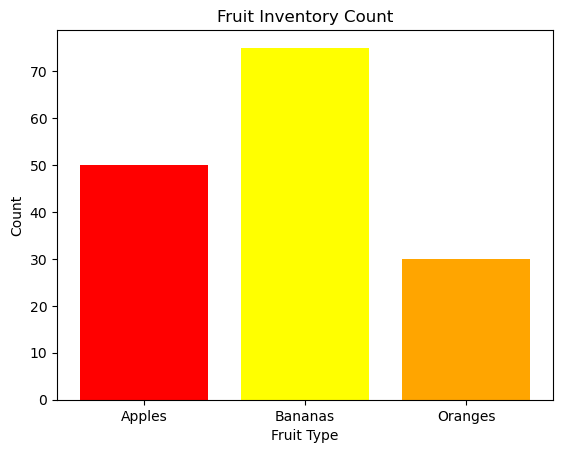

In [4]:
categories = ['Apples', 'Bananas', 'Oranges']
counts = [50, 75, 30]

# Create the Bar Chart
# The first argument is the x-position/labels, the second is the height/value.
plt.bar(categories, counts, color=['red','yellow','orange'])

plt.title("Fruit Inventory Count")
plt.xlabel("Fruit Type")
plt.ylabel("Count")

plt.show()

## 4. Scatter plot (plt.scatter())

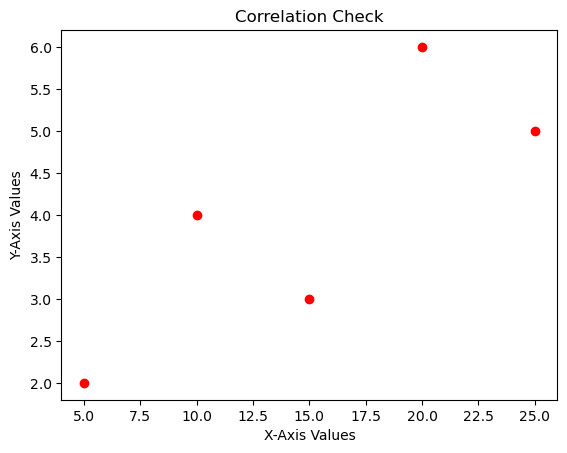

In [5]:
# Data
Xaxis = [5, 10, 15, 20, 25]
Yaxis = [2, 4, 3, 6, 5]

# Create Scatter Plot with customization
scr=plt.scatter(Xaxis, Yaxis, 
            marker='o', # Circle marker
            facecolor='red',  # Marker Face Color (interior) set to red
            color='red') # Set the marker color (edge color) to red

# Set Title
plt.title('Correlation Check')

# Add Labels for clarity (Good practice!)
plt.xlabel("X-Axis Values")
plt.ylabel("Y-Axis Values")

plt.show()

## 5. Object-Oriented Interface 
Since you've mastered the basics of the quick pyplot  style, it's time to learn the Object-Oriented (OO) Interface. This is the method professionals use because it gives you precise control over complex figures and is essential for working with subplots.

#### The Goal: Plotting Multiple Charts
We will now learn how to plot a scatter plot and a line plot side-by-side using the OO method.

#### The  plt.subplots()  Function
The function  plt.subplots()  is the preferred way to start the OO process. It returns two objects:

fig (Figure): The overall container/canvas.

ax (Axes): The individual plot area (or an array of plot areas if you request multiple).

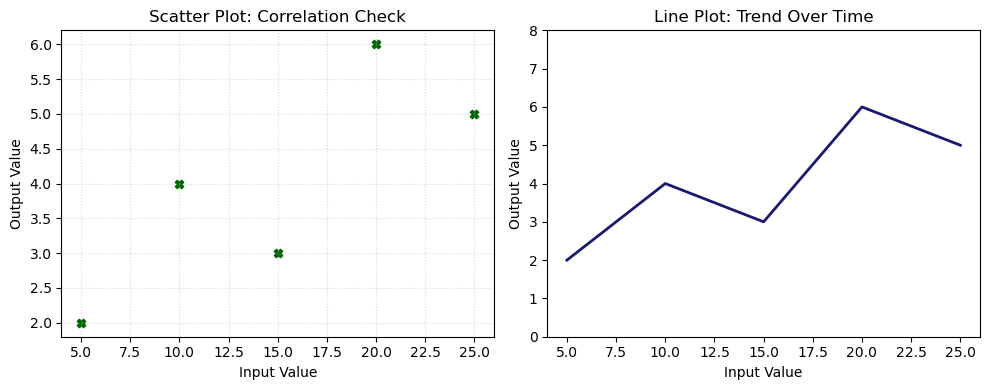

In [6]:
Xaxis = [5, 10, 15, 20, 25]
Yaxis = [2, 4, 3, 6, 5]

# Create Figure (fig) and two Axes objects (scr, lin)
fig, (scr, lin) = plt.subplots(1, 2, figsize=(10, 4)) # Added figsize for better viewing

# 1. Customize the Scatter Plot (scr)
scr.scatter(Xaxis, Yaxis, color='darkgreen', marker='X')
scr.set_title('Scatter Plot: Correlation Check') # Use set_title
scr.set_xlabel('Input Value')                     # Use set_xlabel
scr.set_ylabel('Output Value')                    # Use set_ylabel
scr.grid(True, linestyle=':', alpha=0.5)

# 2. Customize the Line Plot (lin)
lin.plot(Xaxis, Yaxis, color='midnightblue', linewidth=2)
lin.set_title('Line Plot: Trend Over Time')
lin.set_xlabel('Input Value')
lin.set_ylabel('Output Value')
lin.set_ylim(0, 8) # Custom Y-axis limit


# Adjust layout to prevent overlap
fig.tight_layout()

plt.show()

## 6. Customizing Ticks and Limits 
The Axes object (ax) has powerful methods for controlling exactly what appears along the X and Y axes.

| Method | Purpose | Example |
| :--- | :---: | ---: |
ax.set_xlim() / ax.set_ylim() | Explicitly sets the minimum and maximum data values displayed on the axis. | "ax.set_ylim(0, 100)"
ax.set_xticks() / ax.set_yticks() | Specifies the exact data points where the tick marks (and labels) should appear. | "ax.set_xticks([5, 10, 15, 20])"
ax.set_xticklabels() | Assigns custom labels to the ticks specified by ax.set_xticks(). | "ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])"|

Why This Matters
If you plot sales data from day 1 to day 365, the default X-axis will have hundreds of overlapping labels. You need ax.set_xticks() to only label every 30 days, or every month.

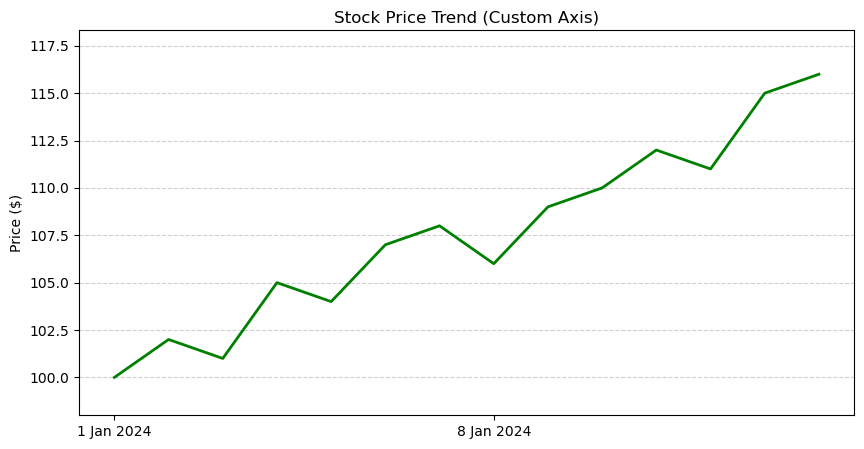

In [7]:
# --- Data Setup (2 weeks of daily data) ---
Dates = pd.date_range('2024-01-01', periods=14, freq='D')
Prices = np.array([100, 102, 101, 105, 104, 107, 108, 106, 109, 110, 112, 111, 115, 116])

# --- Plotting and Customization (OO Interface) ---
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(Dates, Prices, color='green', linewidth=2)

# 1. Set Y-Axis Limits (ax.set_ylim())
ax.set_ylim(Prices.min() * 0.98, Prices.max() * 1.02)

# 2. Set Custom X-Axis Ticks: Only show labels for Jan 1st and Jan 8th
desired_ticks = [Dates[0], Dates[7]]
ax.set_xticks(desired_ticks)

# 3. Set X-tickslables (sets the lables for xticks)
ax.set_xticklabels(['1 Jan 2024', '8 Jan 2024'])

# 4. Add Titles and Polish
ax.set_title("Stock Price Trend (Custom Axis)")
ax.set_ylabel("Price ($)")
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

## 7. Handling Date and Time Data
   When plotting time series data, Matplotlib doesn't automatically format the tick labels perfectly (e.g., it might display dates as numbers or overlap years). You need specialized tools from the matplotlib.dates module.

Method/Tool|Purpose|Why it's Essential
| :--- | :---: | ---: |
mdates.DateFormatter()|"Controls the format of the date labels (e.g., showing only 'Jan-2023' instead of the full '2023-01-01 00:00:00')."|You need to convert Matplotlib's internal date representation into a human-readable string format (like ’%b %Y’).
ax.xaxis.set_major_formatter()|Applies the custom date formatter object to the X-axis.|This is the final step that makes the actual axis labels look correct.
fig.autofmt_xdate()|Automatically rotates and cleans up the date labels to prevent them from overlapping.|This is the quickest way to solve the common problem of crowded date labels.

#### Related Derivatives
Directive|Meaning|Example
| :--- | :---: | ---: |
%Y|Year with Century (four digits)|2025
%m|Month as zero-padded decimal number|11
%d|Day of the month as zero-padded decimal number|12
%H|Hour (24-hour clock)|19 (7 PM)
%A|Full weekday name|Wednesday

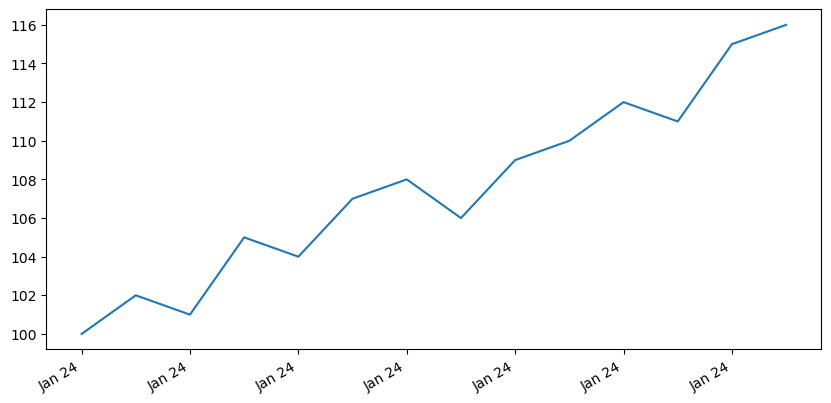

In [8]:
import matplotlib.dates as mdates

# --- Data Setup (2 weeks of daily data) ---
Dates = pd.date_range('2024-01-01', periods=14, freq='D')
Prices = np.array([100, 102, 101, 105, 104, 107, 108, 106, 109, 110, 112, 111, 115, 116])

# Data Setup (Dates must be in datetime format)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(Dates, Prices)

# 1. Create a Formatter object: e.g., 'Jan 23'
Date_form = mdates.DateFormatter("%b %y")

# 2. Apply the Formatter to the X-axis
ax.xaxis.set_major_formatter(Date_form)

# 3. Clean up the label rotation
fig.autofmt_xdate()
plt.show()

# Seaborn

Introduction to Seaborn: Statistical Visualization 

Seaborn is a library built on top of Matplotlib that is specifically designed for creating attractive and informative statistical graphics. While Matplotlib excels at giving you control over every detail, Seaborn excels at providing high-level functions that automatically handle complex data aggregation and visualization styling.

Feature|Matplotlib (plt)|Seaborn (sns)
| :--- | :---: | ---: |
**Data Input**|Primarily takes NumPy arrays.|Primarily takes **Pandas DataFrames** and columns.
**Complexity**|Requires multiple lines of code for stats like mean/variance lines.|"Often requires just **one line of code** for complex statistical plots (e.g., regressions, distributions)."
**Aesthetics**|Default plots are plain; requires manual styling.|**"Beautiful, modern default themes** right out of the box."

## Seaborn plots, categorized by their purpose:
### 1. Univariate/Bivariate Distribution Plots(Showing Data Spread)
These plots show how one or two variables are distributed across their range.
Plot Name | Seaborn Function | Purpose
| :--- | :---: | ---: |
Histogram | sns.histplot() | Shows the frequency distribution of a single numerical variable using bins.
KDE Plot | sns.kdeplot() | Estimates and visualizes the probability density function (smooth curve) of a numerical variable.
Empirical CDF | sns.ecdfplot() | Shows the proportion of data that falls below a certain value (useful for comparing distributions).
Distribution Plot | sns.displot() | "Controls and displays the distribution of a single variable. This function acts as a figure-level wrapper for histplot, kdeplot, and ecdfplot, adding support for faceting."

### 2. Relationship Plots(Showing Correlation)
These plots show how two or more variables are related to each other.
Plot Name|Seaborn Function|Purpose
| :--- | :---: | ---: |
Scatter Plot | sns.scatterplot() | Visualizes the relationship between two numerical variables. Easily incorporates a third categorical variable using the hue parameter.
Regression Plot | sns.regplot() | Creates a scatter plot and automatically adds the best-fit linear regression line and its confidence interval (CI).
Relational Plot | sns.relplot() | "A figure-level function that creates scatter or line plots and easily generates multiple subplots based on categorical variables (e.g., separating data by gender or year)."
Line plot | sns.relplot(kind=’line’/'scatter') | Visualizes trends and changes over a continuous variable (like time). It easily creates multiple subplots (facets) to compare trends across categories.
Scatter → Use when data points are independent, to show correlation.
Line → Use when data is sequential/continuous, to show trends over time or order.

### 3. Categorical Comparison Plots(Comparing Groups)
These plots are used when one of the variables is categorical (groups, labels) and the other is numerical. They are crucial for comparative analysis.
Plot Name | Seaborn Function | Purpose
| :--- | :---: | ---: |
Box Plot | sns.boxplot() | "Displays the five-number summary (median, quartiles, and outliers) for a numerical variable across different categories. Excellent for comparing spread."
Violin Plot | sns.violinplot() | Combines a box plot with a KDE plot to show the full distribution density for each category.
Bar Plot | sns.barplot() | "Shows the mean (average) of a numerical variable for each category, typically with an error bar representing the 95% confidence interval."
Count Plot | sns.countplot() | Shows the total count of observations in each categorical bin (like a histogram for categorical data).
Categorical Plot | sns.catplot(kind=’bar’) | "Compares statistical metrics (like the mean or median) of a numerical variable across different categories. It is the figure-level function for all categorical types (box, violin, bar, etc.)."

### 4. Matrix Plots(Correlation/Clustering)
These plots visualize data in a grid, where color is used to represent the value, reveling correlations and clusters instantly.
Plot Name | Seaborn Function | Purpose
| :--- | :---: | ---: |
Heatmap | sns.heatmap() | "Visualizes data (like a correlation matrix) in a grid format, where the color intensity represents the magnitude of the value. Essential for quickly identifying strong relationships in large datasets."
Pairplot | sns.pairplot() | Visualizes all pairwise relationships between numerical variables in a dataset. It provides a quick visual overview of all correlations and individual distributions.


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data must be in a long-form DataFrame format (ideal for Pandas/Seaborn)

# load dataset from seaborn 
df=sns.load_dataset('tips')

# Set a common style for better aesthetics
sns.set_theme(style="whitegrid")

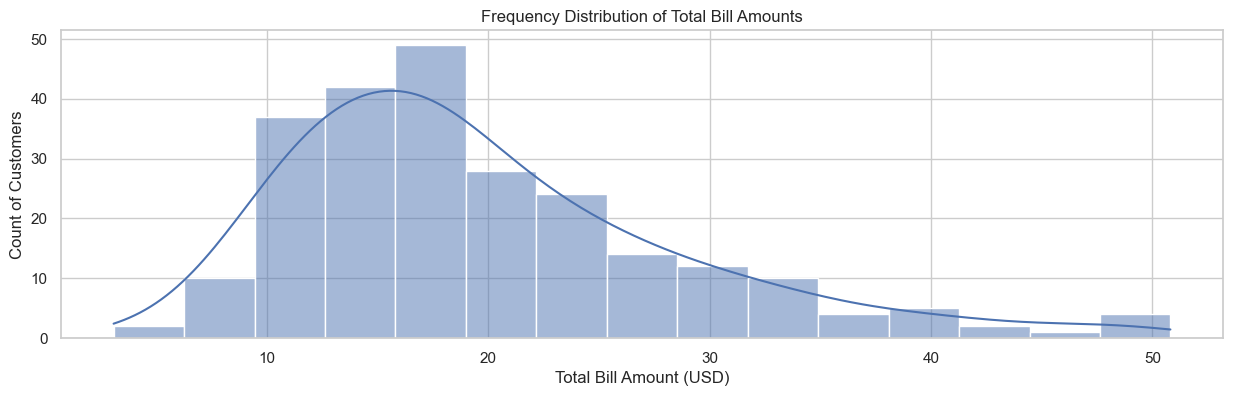

In [10]:
# --- 1. Histogram (sns.histplot) ---
plt.figure(figsize=(15, 4))
ax = sns.histplot(data=df, x='total_bill', bins=15, kde=True)
ax.set_title('Frequency Distribution of Total Bill Amounts')
ax.set_xlabel('Total Bill Amount (USD)')
ax.set_ylabel('Count of Customers')
# The 'kde=True' overlay shows a smooth density curve over the histogram bars.
plt.show()

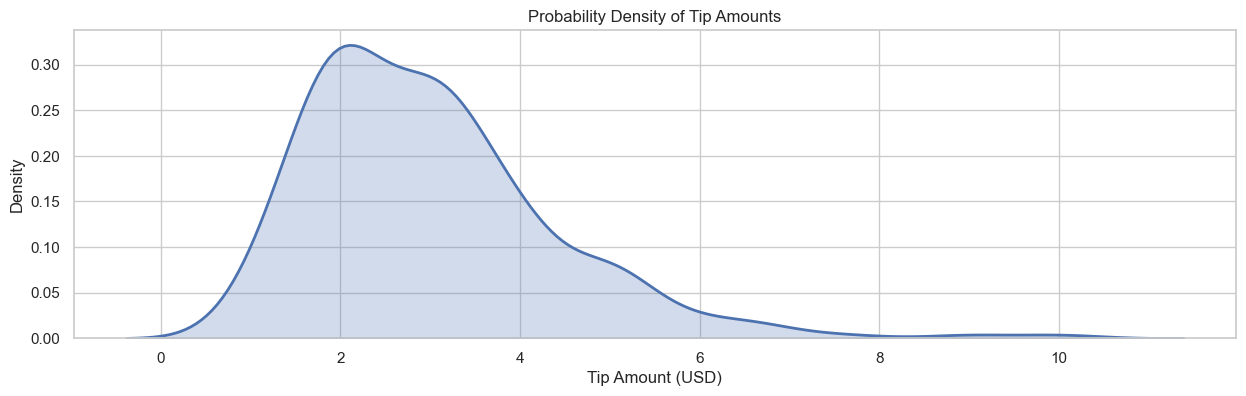

In [11]:
# --- 2. KDE Plot (sns.kdeplot) ---
plt.figure(figsize=(15, 4))
ax = sns.kdeplot(data=df, x='tip', fill=True, linewidth=2)
ax.set_title('Probability Density of Tip Amounts')
ax.set_xlabel('Tip Amount (USD)')
ax.set_ylabel('Density')
# KDE plots are great for smoothing out noise and comparing distributions (e.g., using 'hue').
plt.show()

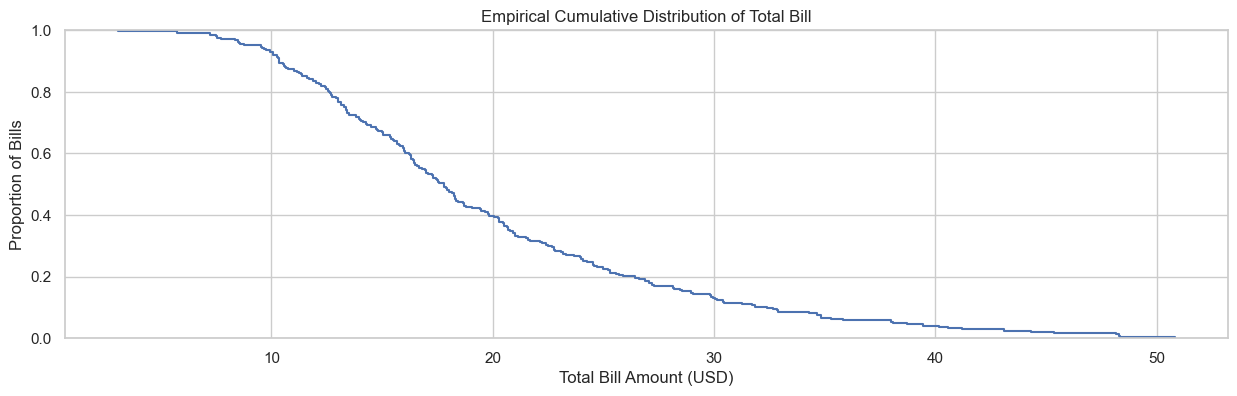

In [12]:
# --- 3. Empirical CDF Plot (sns.ecdfplot) ---
plt.figure(figsize=(15, 4))
ax = sns.ecdfplot(data=df, x='total_bill', complementary=True)
ax.set_title('Empirical Cumulative Distribution of Total Bill')
ax.set_xlabel('Total Bill Amount (USD)')
ax.set_ylabel('Proportion of Bills')
# Reading the chart: The height of the curve at any x-value shows the proportion of bills less than or equal to that amount.

# complementary=False → Standard ECDF
# Shows the proportion of observations ≤ each x-value
# Example: If at x=20, the curve is at 0.6, it means 60% of bills are ≤ 20.

# complementary=True → Complementary ECDF
# Shows the proportion of observations ≥ each x-value
# Example: If at x=20, the curve is at 0.4, it means 40% of bills are ≥ 20.
plt.show()

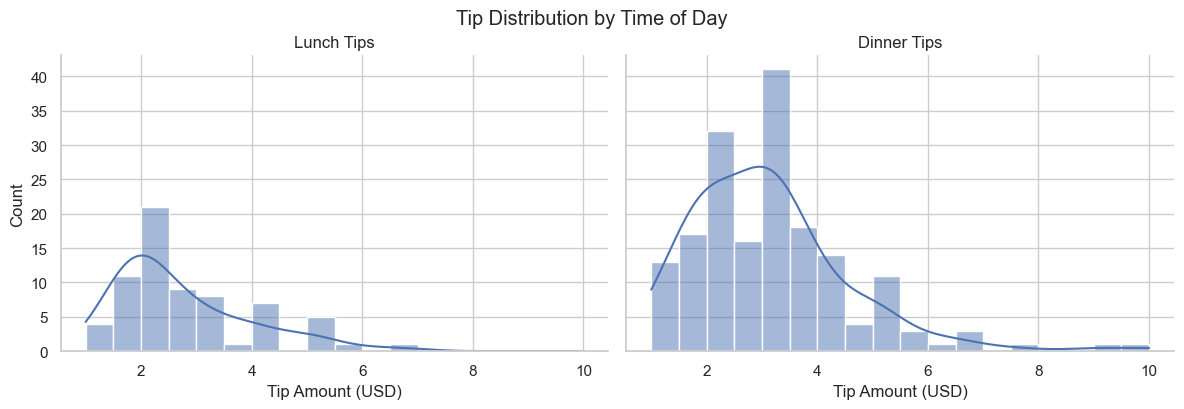

In [13]:
# --- 4. Distribution Plot (sns.displot) ---
# displot is a figure-level function, allowing easy faceting (splitting the plot)
g = sns.displot(
    data=df, 
    x='tip', 
    col='time',       # Create separate columns for 'Lunch' and 'Dinner'
    kind='hist',      # Specify the plot type (can be 'kde' or 'ecdf')
    kde=True,
    height=4, 
    aspect=1.5
)
# Set individual titles for each subplot
g.set_titles(col_template="{col_name} Tips")

g.fig.suptitle('Tip Distribution by Time of Day', y=1.02)
g.set_axis_labels('Tip Amount (USD)', 'Count')
# 'displot' is useful for creating multi-panel figures (facets) easily.
plt.show()

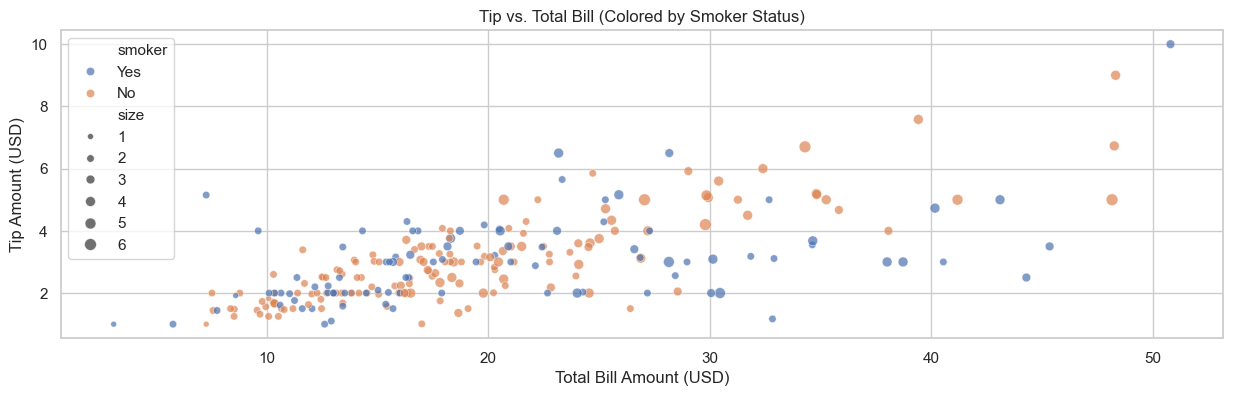

In [14]:
# --- 1. Scatter Plot (sns.scatterplot) ---
plt.figure(figsize=(15, 4))
ax = sns.scatterplot(
    data=df, 
    x='total_bill', 
    y='tip', 
    hue='smoker',      # Color points based on smoker status
    size='size',       # Vary point size based on party size
    alpha=0.7,          # Set transparency
)
ax.set_title('Tip vs. Total Bill (Colored by Smoker Status)')
ax.set_xlabel('Total Bill Amount (USD)')
ax.set_ylabel('Tip Amount (USD)')
# This plot clearly shows the positive correlation and differences between smokers/non-smokers.
plt.show()

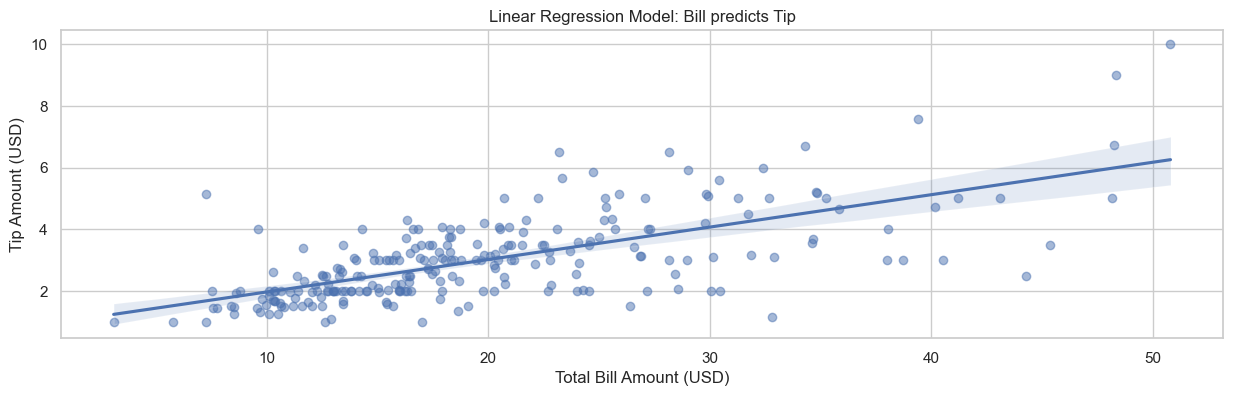

In [15]:
# 2. Regression Plot (sns.regplot) ---
plt.figure(figsize=(15, 4))
ax = sns.regplot(
    data=df, 
    x='total_bill', 
    y='tip', 
    ci=95,             # Display a 95% confidence interval around the line
    scatter_kws={'alpha':0.5} # Customizes transparency for the scatter points
)
ax.set_title('Linear Regression Model: Bill predicts Tip')
ax.set_xlabel('Total Bill Amount (USD)')
ax.set_ylabel('Tip Amount (USD)')
# The shaded area represents the uncertainty (CI) in the linear model fit.
plt.show()

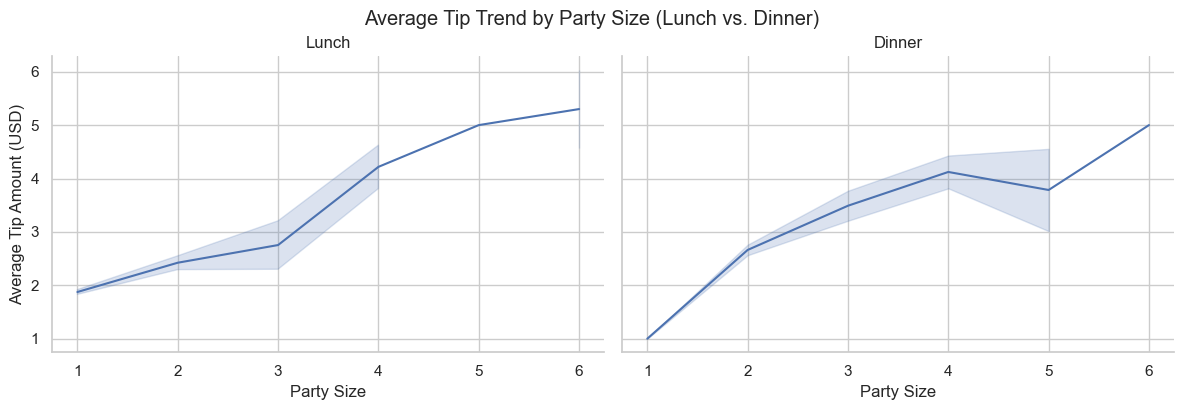

In [16]:
# 3. Relational Plot (sns.relplot) & Line Plot ---
# We'll use relplot to create two line plots (facets) to compare trends over a categorical variable ('size')

# For a Line Plot, we need to order the X-axis (e.g., Party Size)
# We also use 'kind='line'' explicitly within relplot

g = sns.relplot(
    data=df, 
    x='size', 
    y='tip', 
    kind='line',       # Explicitly set the plot type to 'line'
    col='time',        # Create separate plots for 'Lunch' and 'Dinner'
    errorbar='se',     # Show standard error (SE) instead of CI
    height=4,
    aspect=1.5
)
# Set individual titles for each subplot
g.set_titles(col_template="{col_name}")

g.fig.suptitle('Average Tip Trend by Party Size (Lunch vs. Dinner)', y=1.02)
g.set_axis_labels('Party Size', 'Average Tip Amount (USD)')
# This shows how the average tip changes as party size increases, faceted by time.
plt.show()

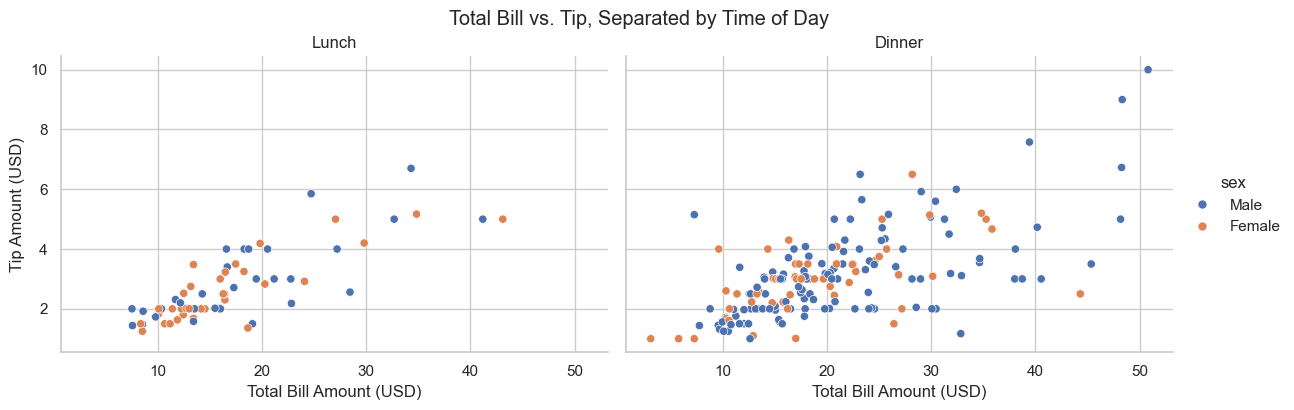

In [17]:
# 4. Relational Plot (Scatter Kind) ---

# Use relplot with kind='scatter' to visualize total_bill vs. tip, 
# and facet the plot by 'time' (Lunch and Dinner)
g = sns.relplot(
    data=df, 
    x='total_bill', 
    y='tip', 
    kind='scatter', # Explicitly set the plot type
    col='time',     # Create separate columns for 'Lunch' and 'Dinner'
    hue='sex',      # Color the points based on gender
    height=4,       # Set the height of each facet
    aspect=1.5         # Set the aspect ratio of each facet
)
# Set individual titles for each subplot
g.set_titles(col_template="{col_name}")

# Set the overall title for the figure
g.fig.suptitle('Total Bill vs. Tip, Separated by Time of Day', y=1.02)
# Set axis labels (applies to all facets)
g.set_axis_labels('Total Bill Amount (USD)', 'Tip Amount (USD)')

plt.show()

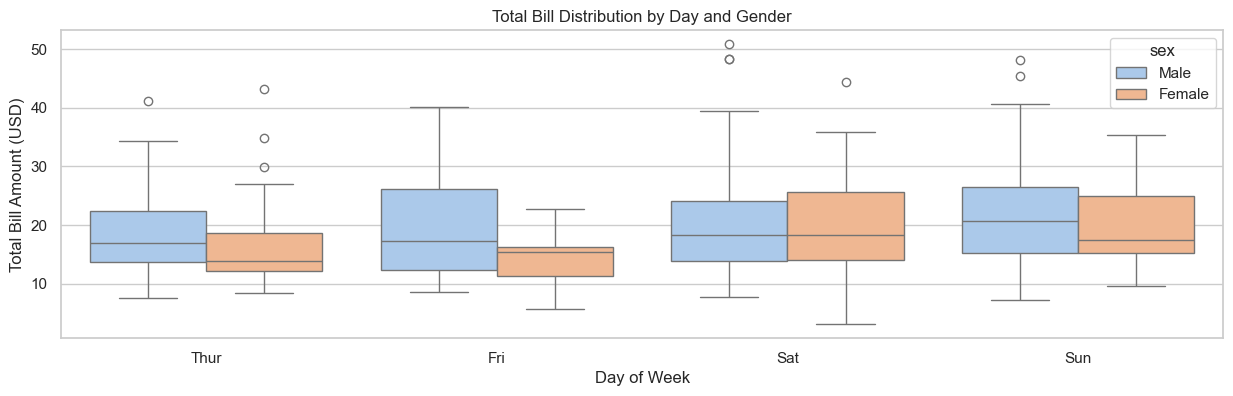

In [18]:
# --- 1. Box Plot (sns.boxplot) ---
plt.figure(figsize=(15, 4))
ax = sns.boxplot(data=df, x='day', y='total_bill', hue='sex', palette='pastel')
ax.set_title('Total Bill Distribution by Day and Gender')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Total Bill Amount (USD)')
# Shows median, spread (IQR), and outliers for each group.
plt.show()

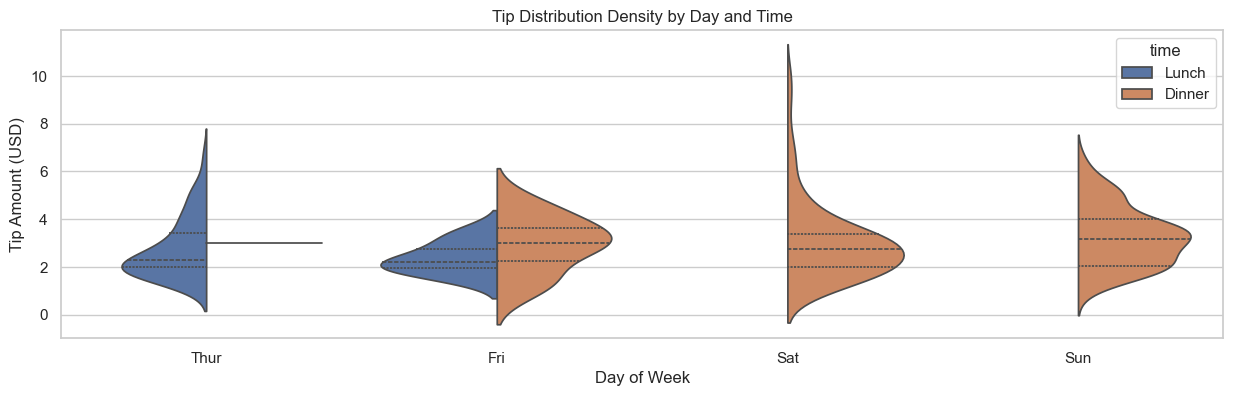

In [19]:
# --- 2. Violin Plot (sns.violinplot) ---
plt.figure(figsize=(15, 4))
ax = sns.violinplot(data=df, x='day', y='tip', hue='time', split=True, inner='quartile')
ax.set_title('Tip Distribution Density by Day and Time')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Tip Amount (USD)')
# 'split=True' saves space when using 'hue' by sharing the kernel density estimate.
# instead of two, it splits one violin in half: left=lunch, right=dinner
plt.show()

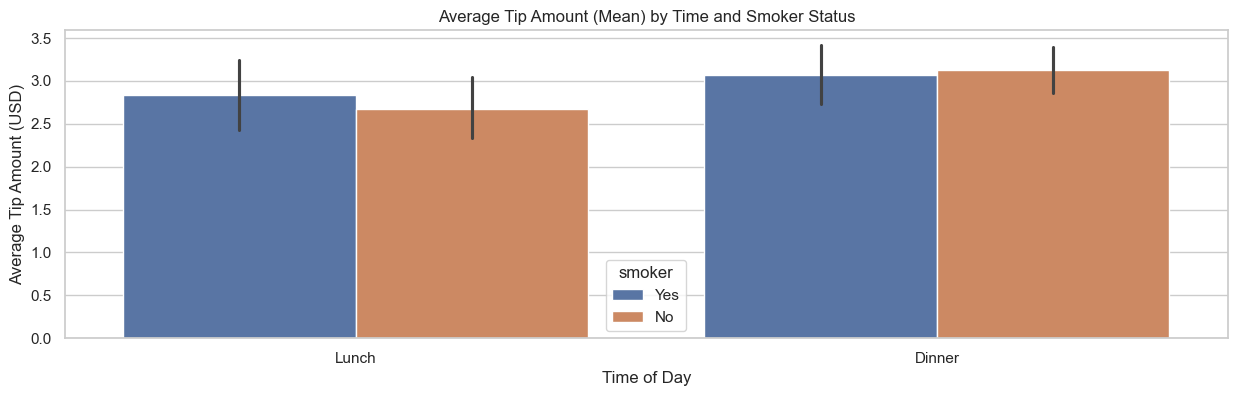

In [20]:
# --- 3. Bar Plot (sns.barplot) ---
plt.figure(figsize=(15, 4))
ax = sns.barplot(data=df, x='time', y='tip', hue='smoker')
ax.set_title('Average Tip Amount (Mean) by Time and Smoker Status')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Average Tip Amount (USD)')
# The thin vertical lines are the 95% confidence intervals (CI).
plt.show()

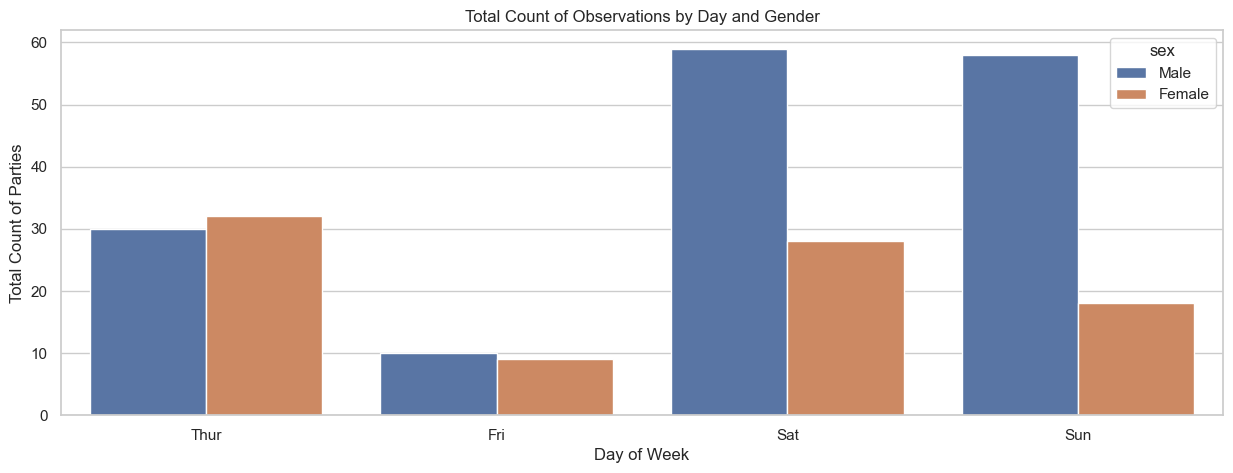

In [21]:
# --- 4. Count Plot (sns.countplot) ---
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='day', hue='sex')
ax.set_title('Total Count of Observations by Day and Gender')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Total Count of Parties')
# This is equivalent to a histogram for categorical data.
plt.show()

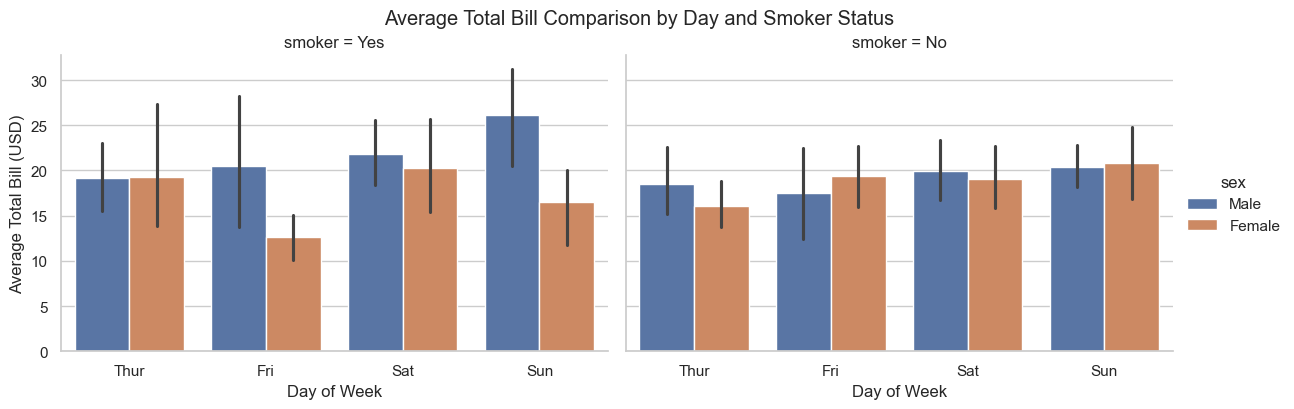

In [22]:
# --- 5. Categorical Plot (sns.catplot) ---
# A figure-level function that creates multiple bar plots (facets) for easier comparison.
g = sns.catplot(
    data=df, 
    x='day', 
    y='total_bill', 
    hue='sex', 
    kind='bar', # Set the plot type to bar
    col='smoker', # Create separate columns for 'Smoker' and 'Non-Smoker'
    height=4, 
    aspect=1.5
)

g.fig.suptitle('Average Total Bill Comparison by Day and Smoker Status', y=1.02)
g.set_axis_labels('Day of Week', 'Average Total Bill (USD)')
plt.show()

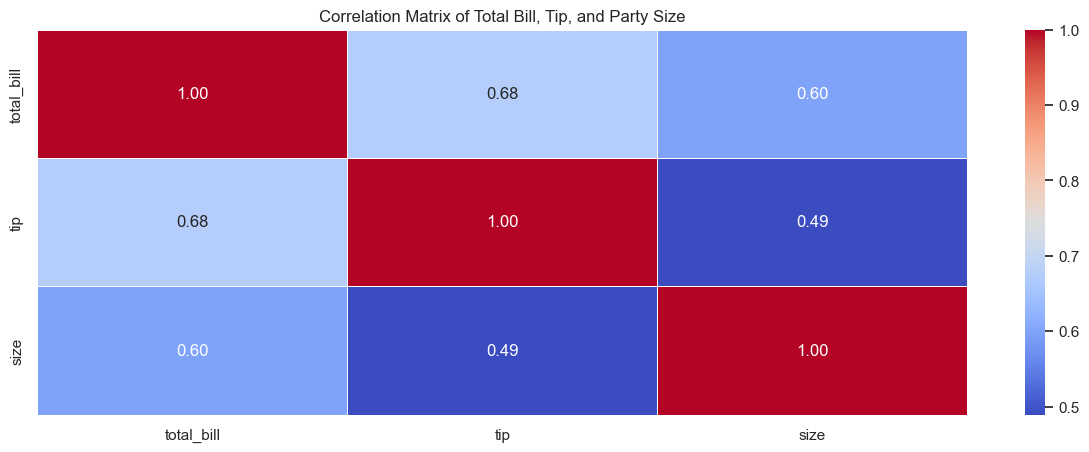

In [23]:
# --- 1. Heatmap (sns.heatmap) ---

# Heatmaps require a matrix-like input, like a correlation matrix.
# We first select the numeric columns and calculate their pairwise correlation.
numeric_df = df[['total_bill', 'tip', 'size']]
corr_matrix = numeric_df.corr()

plt.figure(figsize=(15, 5))
ax = sns.heatmap(
    corr_matrix, 
    annot=True,     # Display the correlation values on the map
    cmap='coolwarm',# Use a diverging colour map (red for negative, blue for positive)
    fmt=".2f",      # Format numbers to two decimal places
    linewidths=.5   # Add subtle lines between cells
)
ax.set_title('Correlation Matrix of Total Bill, Tip, and Party Size')
# The heatmap instantly shows the strength and direction of linear relationships.
plt.show()

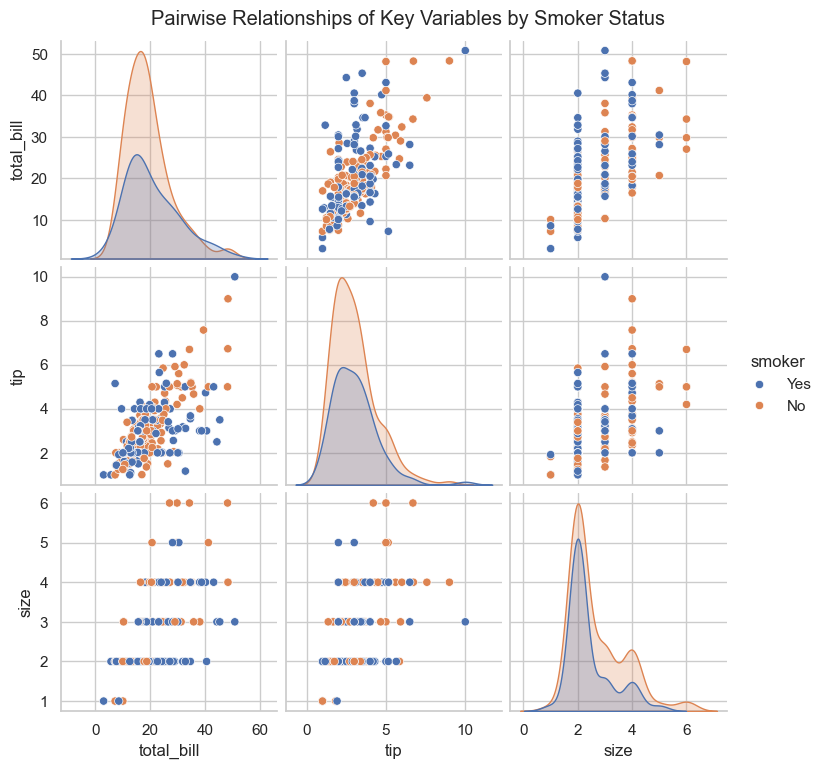

In [24]:
# 2. Pairplot (sns.pairplot) ---

# Pairplot creates a grid of plots showing all pairwise relationships and distributions.
g = sns.pairplot(
    df, 
    vars=['total_bill', 'tip', 'size'], # Specify which numerical variables to include
    hue='smoker',                       # Color points based on the 'smoker' categorical variable
    diag_kind='kde'                     # Use KDE plots for the diagonal (univariate distribution)
)
g.fig.suptitle('Pairwise Relationships of Key Variables by Smoker Status', y=1.02)
# The pairplot provides a rapid, high-level overview of the entire dataset structure.
plt.show()